In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate non-linear noisy data
np.random.seed(1017)
X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(0, 0.4, X.shape[0])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1017)

## __High Bias and Underfitting__

In [2]:
# Modelo 1: Lineal (High Bias - Underfitting)
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X)

## __High Variance and Overfitting__

In [3]:
#Model 2: Polinomial Degree 20 (High Variance - Overfitting)
poly_overfit = Pipeline([
    ('poly', PolynomialFeatures(degree=20)),
    ('linear', LinearRegression())
])
poly_overfit.fit(X_train, y_train)
y_pred_overfit = poly_overfit.predict(X)

## __Balanced Model__

In [4]:
# Model 3: Polinomial Degree 3
poly_balanced = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])
poly_balanced.fit(X_train, y_train)
y_pred_balanced = poly_balanced.predict(X)

## __Results and Errors__

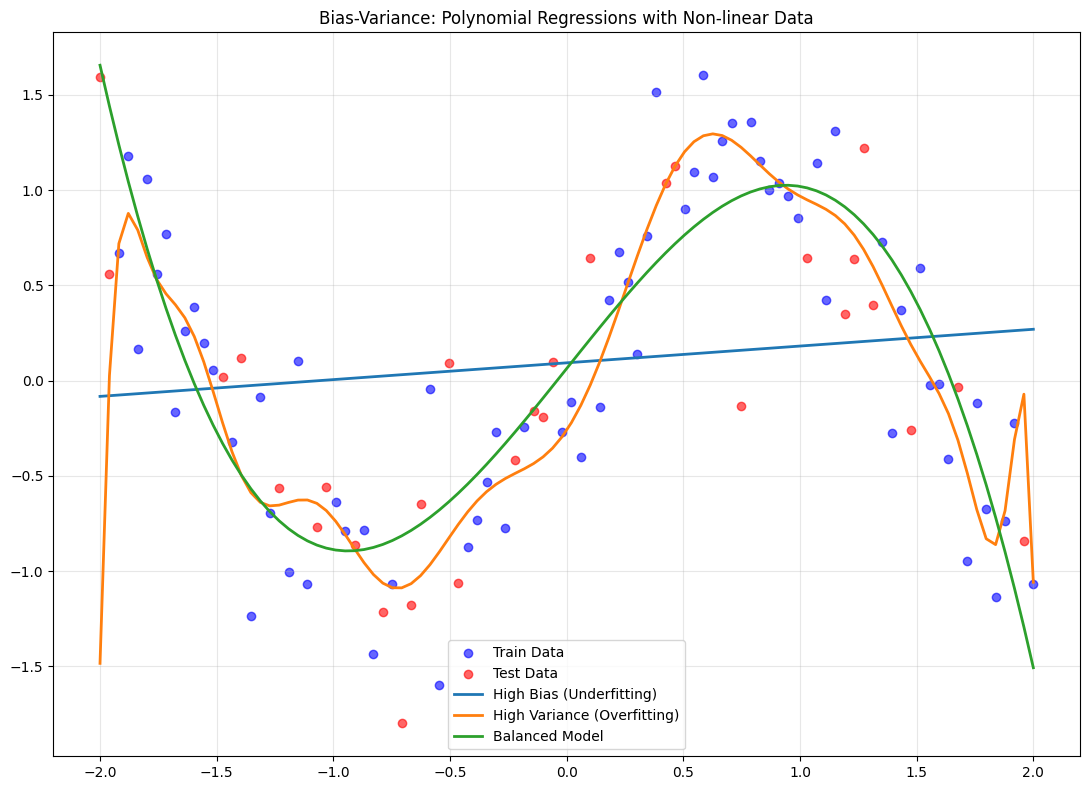

Underfitted Model - Train MSE: 0.6526, Test MSE: 0.6287
Overfitted Model - Train MSE: 0.1092, Test MSE: 0.5336
Balanced Model - Train MSE: 0.1679, Test MSE: 0.2236


In [5]:
models = [
    (y_pred_linear, "High Bias (Underfitting)"),
    (y_pred_overfit, "High Variance (Overfitting)"),
    (y_pred_balanced, "Balanced Model")
]

# Plot results
fig, _ = plt.subplots(figsize=(11, 8))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Train Data')
plt.scatter(X_test, y_test, color='red', alpha=0.6, label='Test Data')
for i, (y_pred, title) in enumerate(models):
    plt.plot(X, y_pred, linewidth=2, label=title)
    
plt.title("Bias-Variance: Polynomial Regressions with Non-linear Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./figures/bias_variance.png")
plt.show()

# Error metrics
train_score_linear = mean_squared_error(y_train, model_linear.predict(X_train))
test_score_linear = mean_squared_error(y_test, model_linear.predict(X_test))

train_score_balanced = mean_squared_error(y_train, poly_balanced.predict(X_train))
test_score_balanced = mean_squared_error(y_test, poly_balanced.predict(X_test))

train_score_overfit = mean_squared_error(y_train, poly_overfit.predict(X_train))
test_score_overfit = mean_squared_error(y_test, poly_overfit.predict(X_test))

print(f"Underfitted Model - Train MSE: {train_score_linear:.4f}, Test MSE: {test_score_linear:.4f}")
print(f"Overfitted Model - Train MSE: {train_score_overfit:.4f}, Test MSE: {test_score_overfit:.4f}")
print(f"Balanced Model - Train MSE: {train_score_balanced:.4f}, Test MSE: {test_score_balanced:.4f}")